In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
df100 = pd.read_csv('cars-dataset.csv')
df100.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [248]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [249]:
# Removing/Dropping column which is not required for the model
name = df100['car name']
df100 = df100.drop('car name', axis=1)
df100.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [250]:
 #Replace all non-numeric entries with NaN
df100 = df100.replace('?',np.nan)

In [253]:
#Replace the NaN values with median
df100 = df100.apply(lambda x: x.fillna(x.mean()),axis=0)  
df100.head(33)

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.000000,3504,12.0,70,18.0
1,8,350.0,165.000000,3693,11.5,70,15.0
2,8,318.0,150.000000,3436,11.0,70,18.0
3,8,304.0,150.000000,3433,12.0,70,16.0
4,8,302.0,140.000000,3449,10.5,70,17.0
5,8,429.0,198.000000,4341,10.0,70,15.0
6,8,454.0,220.000000,4354,9.0,70,14.0
7,8,440.0,215.000000,4312,8.5,70,14.0
8,8,455.0,225.000000,4425,10.0,70,14.0
9,8,390.0,190.000000,3850,8.5,70,15.0


In [252]:
df100['hp'] = df100['hp'].astype('float64')

In [254]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [255]:
x = df100[df100.columns[0:-1]]
y = df100["mpg"]

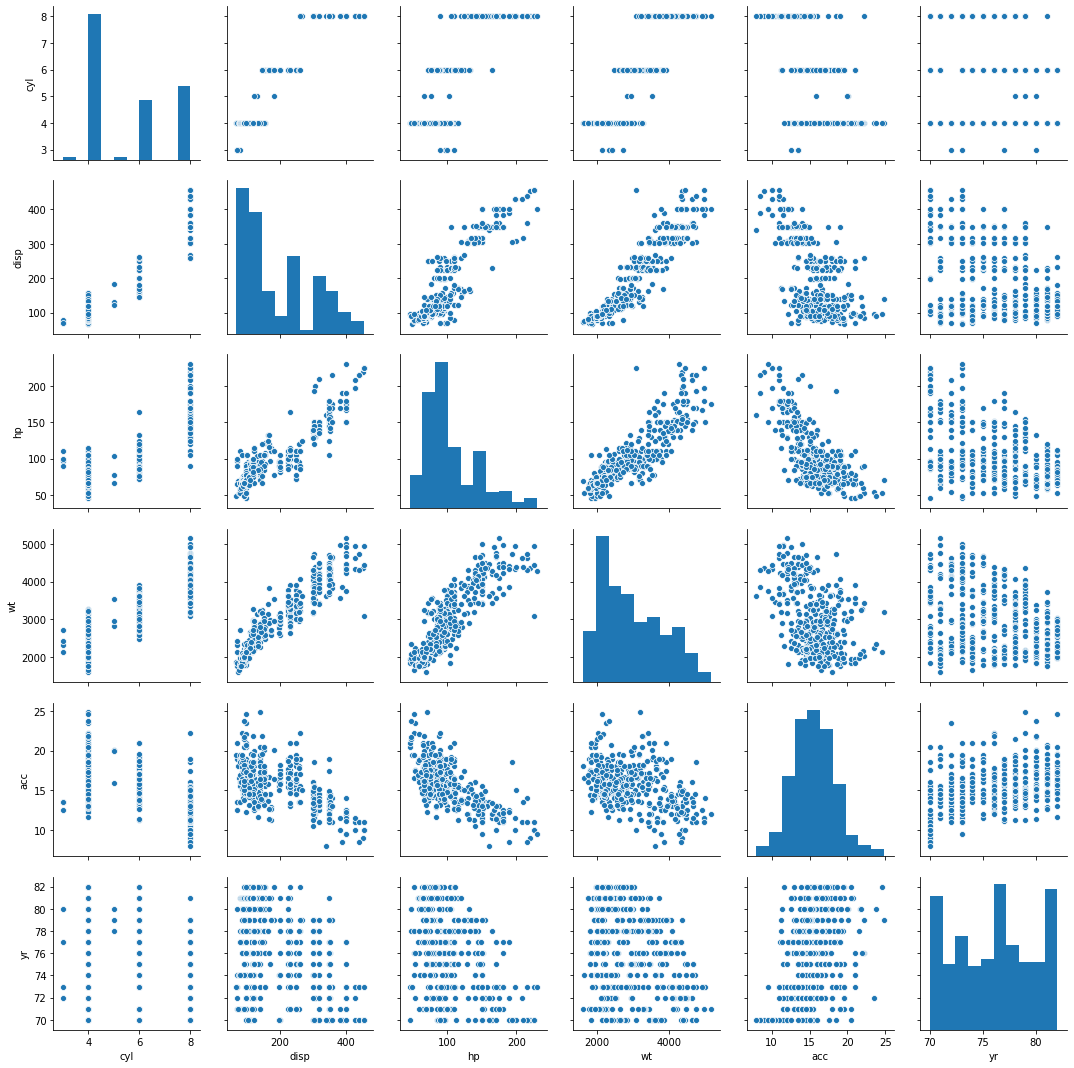

In [256]:
sns.pairplot(x)

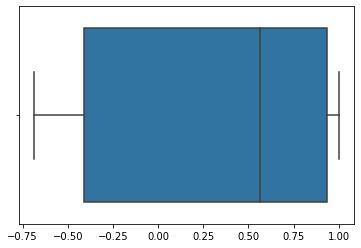

In [257]:
sns.boxplot(x.corr())

In [258]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore


In [259]:
sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

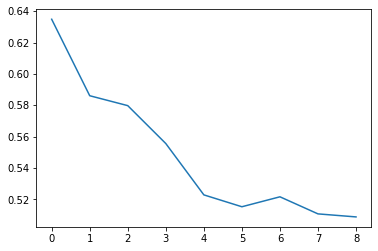

In [260]:
plt.plot(sil)

Text(0.5, 1.0, 'K-Means Classification')

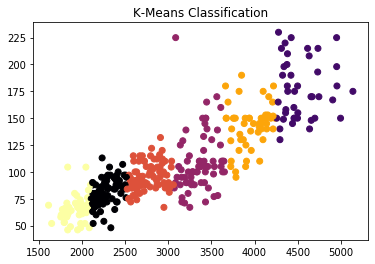

In [261]:
plt.scatter(x.wt,x.hp,c=clustering.labels_,cmap = 'inferno')
plt.title("K-Means Classification")

In [262]:
#KMeans
clustering = KMeans(n_clusters = 6)
clustering.fit(x)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [263]:
clustering.labels_

array([3, 1, 3, 3, 3, 4, 4, 4, 4, 1, 3, 3, 1, 2, 5, 2, 2, 5, 0, 0, 5, 5,
       5, 0, 5, 4, 4, 4, 4, 0, 0, 0, 0, 5, 3, 3, 3, 3, 1, 4, 1, 1, 4, 4,
       4, 2, 5, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 4, 1, 1,
       3, 4, 4, 4, 4, 5, 1, 1, 4, 1, 2, 5, 2, 0, 5, 0, 5, 0, 0, 1, 3, 1,
       1, 1, 4, 4, 4, 1, 4, 4, 1, 2, 3, 2, 2, 2, 0, 4, 4, 4, 4, 2, 0, 5,
       5, 0, 5, 5, 0, 1, 4, 0, 0, 5, 2, 3, 5, 2, 3, 2, 2, 2, 3, 0, 5, 0,
       5, 1, 3, 3, 1, 4, 4, 4, 1, 0, 0, 5, 0, 0, 0, 0, 0, 5, 5, 0, 3, 3,
       3, 2, 4, 4, 4, 4, 1, 1, 1, 1, 2, 3, 2, 0, 5, 2, 5, 5, 0, 5, 2, 0,
       3, 5, 2, 2, 5, 0, 5, 0, 5, 0, 0, 1, 1, 1, 1, 3, 3, 2, 2, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 5, 2, 1, 3, 2, 1, 4, 1, 1, 1, 0, 0, 0, 5,
       0, 1, 1, 1, 4, 3, 3, 3, 3, 1, 1, 4, 4, 0, 5, 0, 2, 0, 0, 0, 0, 2,
       5, 5, 0, 0, 0, 0, 0, 3, 1, 3, 3, 2, 2, 5, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 1, 0, 5, 5, 0, 5, 2, 2, 5, 2, 2, 2, 3, 0, 0, 3, 2, 2, 3, 3, 1,
       1, 1, 1, 4, 1, 3, 1, 0, 0, 0, 5, 3, 1, 2, 3,

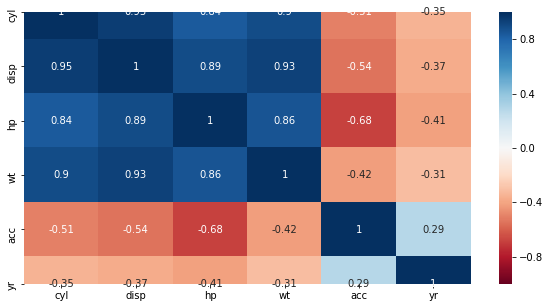

In [264]:
plt.figure(figsize=(10,5))

sns.heatmap(x.corr(),cmap='RdBu', annot=True, vmin=-1, vmax=1)

In [265]:
np.round(np.cov(x))

array([[1937223., 2037414., 1895867., ..., 1269079., 1456715., 1510168.],
       [2037414., 2142997., 1994060., ..., 1334378., 1531507., 1587695.],
       [1895867., 1994060., 1855493., ..., 1241806., 1425301., 1477596.],
       ...,
       [1269079., 1334378., 1241806., ...,  832488.,  955889.,  991005.],
       [1456715., 1531507., 1425301., ...,  955889., 1097780., 1138135.],
       [1510168., 1587695., 1477596., ...,  991005., 1138135., 1179977.]])

In [266]:
lc = StandardScaler()
x_std =  lc.fit_transform(x)          
cov_matrix = np.cov(x_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00251889  0.95311615  0.84105256  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.89589723  0.93517383 -0.54505356 -0.37109656]
 [ 0.84105256  0.89589723  1.00251889  0.86274199 -0.6859827  -0.4126879 ]
 [ 0.89827376  0.93517383  0.86274199  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.6859827  -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.4126879  -0.30733654  0.28886274  1.00251889]]


In [267]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.45526182  0.18219422 -0.17124425 -0.64816936 -0.46377301  0.30823437]
 [ 0.46934018  0.16027323 -0.13453195 -0.18920163  0.83673991 -0.00158535]
 [ 0.46261026  0.0151916   0.1247117   0.64431141 -0.0955392   0.58816921]
 [ 0.44640084  0.25624036 -0.27173253  0.3209813  -0.27190298 -0.69589394]
 [-0.32468348  0.21010549 -0.8676763   0.15899017  0.03882393  0.26606201]
 [-0.23185157  0.91163783  0.3321488   0.02520241  0.01465116  0.06315596]]

 Eigen Values 
%s [4.25994348 0.84071546 0.67496226 0.1377338  0.03627179 0.06548657]


In [268]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=1)
x_train_std = lc.fit_transform(x_train)
x_test_std = lc.transform(x_test)


In [269]:
from sklearn.decomposition import PCA

In [270]:
pcamodel = PCA(n_components=2)
x_train_reduced = pcamodel.fit_transform(x_train_std)
x_test_reduced = pcamodel.transform(x_test_std)

In [271]:
#Linear Regression
reg_model = LinearRegression()
reg_model.fit(x_train_reduced,y_train)

reg_model.coef_

array([-3.16811435,  1.48755746])

In [272]:
reg_model.score(x_train_reduced, y_train)

0.7150595669601636

In [273]:
reg_model.score(x_test_reduced, y_test)

0.760027520346534

In [274]:
regress_model101 = LinearRegression()

reg_model101.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [275]:
reg_model101.score(x_train, y_train)

0.7997247899128472

In [276]:
reg_model101.score(x_test, y_test)

0.8265574169791731